<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:8- Autoregressive ML Models </center></h1></u>

Hello everyone!! Welcome back to the 8th Assignment of the time series module.

![](https://c.tenor.com/cg0h-BiFJ5gAAAAM/star-wars-baby-yoda.gif)

In this assignment you will be learning about Autoregressive ML models

<h2><u>Table of Contents:</h2></u>

1. Autoregressive (AR) models<br>
2. AR concepts with example<br>
3. Implementing AR models<br>

<h2><u>Autoregressive (AR) models</h2></u>

![](https://pbs.twimg.com/media/ESaqZwFUUAAtMps?format=jpg&name=large)

Autoregressive (AR) models are a type of time series model that can be used to forecast future values based on past data. To create accurate predictions, AR models employ regression techniques and rely on autocorrelation.

One of the techniques used for time-series analysis is autoregressive (AR) modelling. AR models are a useful tool in time series analysis since they allow us to estimate the future using previous data. AR models can be used to represent anything that has some degree of autocorrelation, which means that observations at adjacent time steps have a correlation. This type of modelling is most commonly used with stock market prices, where the price today (t) is highly associated with the price one day ago (t-1).

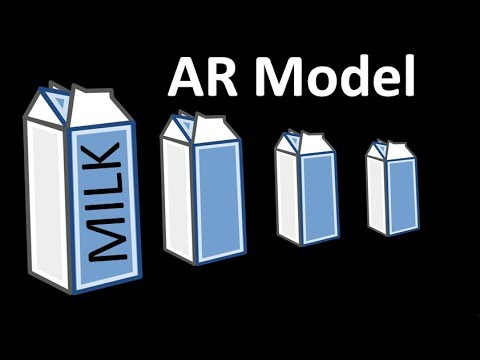

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('5-2C4eO4cPQ', width=700, height=400)

<h2><u>AR concepts with example</h2></u>

The value of the response variable is used to train a regression model using autoregressive modelling. The words Auto and Regressive combine to form Autoregressive, which stands for linear regression on itself (auto). Autoregressive modelling, in the context of time-series forecasting, refers to the creation of a model in which the response variable Y is dependent on prior values of Y at a pre-determined continuous time lag.

* Yt=β0+β1∗Yt−1+errort

The value at the last time lag is used in the aforementioned model. If the time lag is weekly, the value of Yt1 will be the value of Y from the previous week. AR models of the first model, or AR (1) models, are those in which the value of the response variable is taken with only a one-time lag. Let's look at the sale of refrigerators as an example. The task at hand is to anticipate sales for a specific date in the future. Furthermore, the data we have is historical sales data for the last three years. The refrigerator sale from last week will be taken into account by the AR model of first order with a one-week time lag.

Let’s understand the AR model concept with another example and the following diagram.

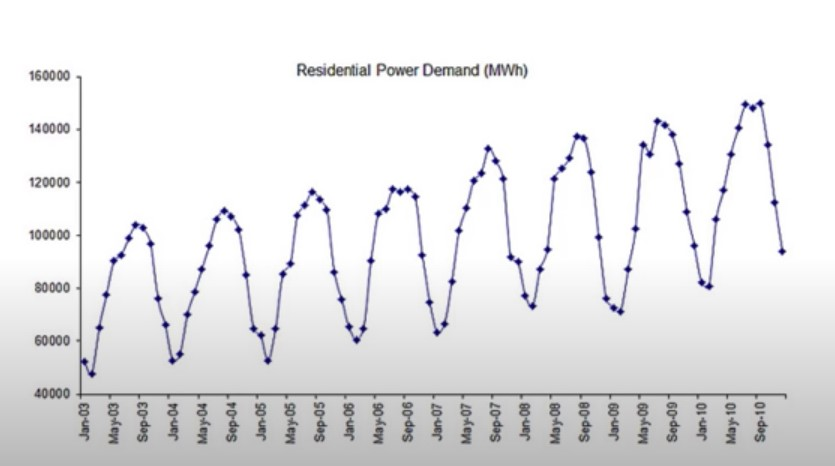

From 2003 to 2010, the above graph depicts the residential electricity demand in different months. The request will be to anticipate power demand in the following months using the data. With a one-month lag, the AR (1) model, or AR model of first order, will look like this:
* PowerDemandt=β0+β1∗PowerDemandYt–1+errort

AR models have the parameter termed as p. The parameter p represents the previous values of p number of time lags when training the model. The AR model of 2nd order will have the value of the response variable at any particular time depending upon the values of the last two lags. Thus, AR (2) model will look like the following:

* Yt=β0+β1∗Yt−1+β2∗Yt−2+errort
Generalizing the above for p, the AR (p) model will look like the following:

* Yt=β0+β1∗Yt−1+β2∗Yt−2+…+βp∗Yt−p+errort

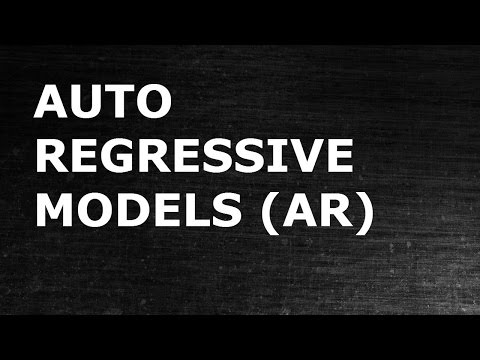

In [2]:
YouTubeVideo('3VzRe9x1Z4E', width=700, height=400)

<h2><u>Implementing AR models</h2></u>

To import the ar model.AR class, which is used to train a univariate autoregressive (AR) model of order p, we will use the statsmodels.tsa package. It's worth noting that statsmodels.tsa includes model classes and routines for time series analysis.

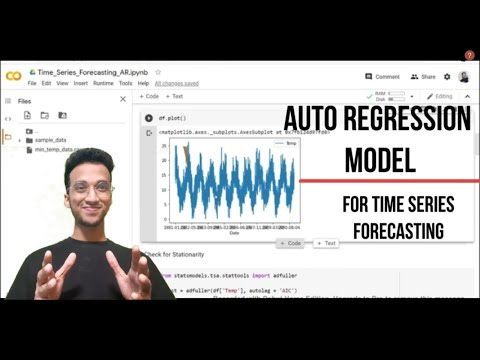

In [3]:
## refer video
YouTubeVideo('lPvIkGZjbZk', width=700, height=400)

Lets start by importing the necessary libraries.
* pandas: for storing and analyzing data
* matplotlib: for plotting graphs and visualizations
* numpy: for array and matrix operations
* AutoReg: for implementing the AR model, https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html?highlight=autoreg

In [4]:
! pip install AutoReg


  Preparing metadata (setup.py) ... done
  Created wheel for AutoReg: filename=AutoReg-1.1-py3-none-any.whl size=3642 sha256=a8ecacbcd16d41c3384603d897a7437648a32f40cf1cff0e20834c109e5e0ca8
  Stored in directory: /root/.cache/pip/wheels/1a/a1/1b/787a48d0f6003e58ec24d3eaf7d9673566c633069c88624739
Successfully built AutoReg


To prevent any errors, upgrade the statsmodels package.

In [5]:
! pip install statsmodels --upgrade


Next import the above mentioned libraries:
* pandas
* numpy
* matplotlib
* AutoReg

In [6]:
# Import the above mentioned libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [7]:
# import drive from google.colab
import google.colab

# mount the drive
mount = google.colab.drive.mount('/content/drive')


Mounted at /content/drive


Start by reading and loading the data. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1xSOH1oDcFzQY63bJYVzhkcsKDr0lMs2Z/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has 2 columns date and consumption of energy.

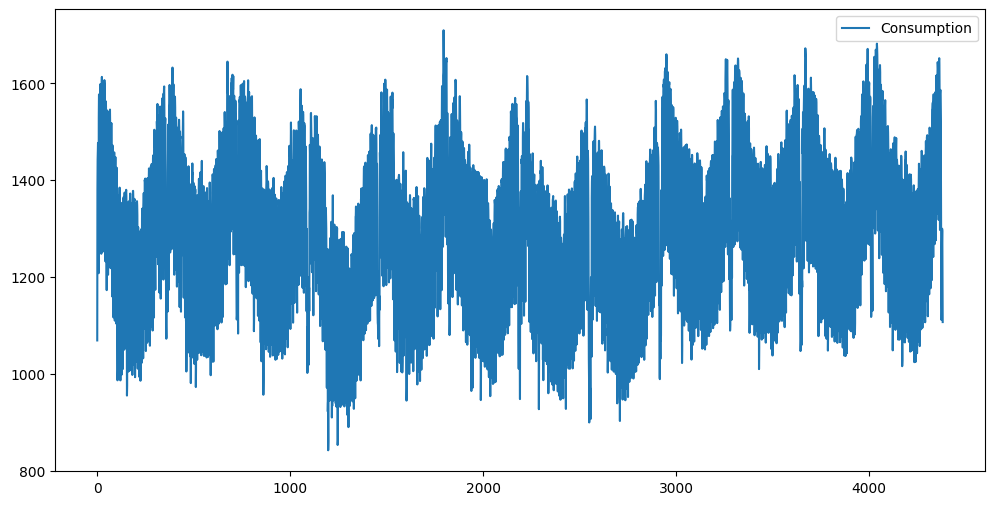

In [11]:
#get the dataset link
url='/content/daily_consumption.csv'

#read the data using read_csv
df=pd.read_csv(url)

#plot the consumption column
df.plot(figsize=(12,6))
plt.show()



Before going ahead and training the AR model, the following will be needed to be found:

* <u>Stationarity of the time-series data:</u> The stationarity of the data can be found using adfuller class of statsmodels.tsa.stattools module. The value of p-value is used to determine whether there is stationarity. If the value is less than 0.05, the stationarity exists.


In [12]:
#Import adfuller
from statsmodels.tsa.stattools import adfuller

# Run the test for consumption column
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')

# Check the value of p-value
df_stationarityTest[1]



np.float64(4.744054901842357e-08)

hence the p value is less than 0.05 which means that the data is stationary.
Next task is to find the order of auto regressive term(p).
* <u>Order of AR model to be trained:</u> The order of AR model is determined  by checking the partial autocorrelation plot. The plot_pacf method of statsmodels.graphics.tsaplots is used to plot.

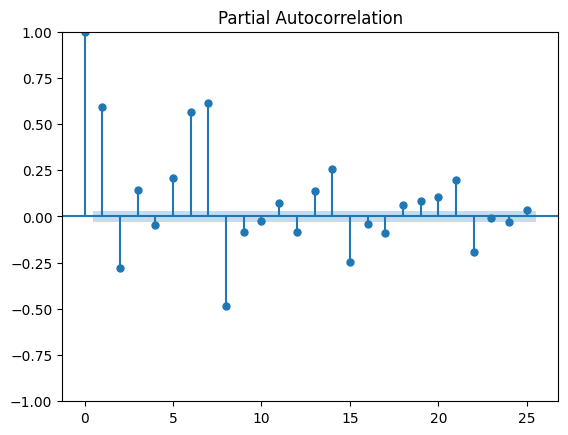

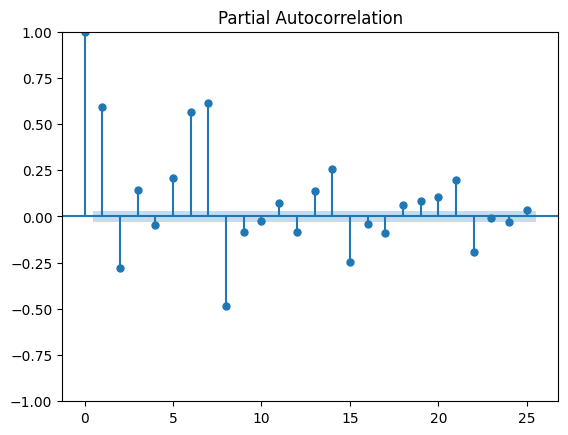

In [13]:
#import pacf
from statsmodels.graphics.tsaplots import plot_pacf

#plot acf,lags=25
plot_pacf(df['Consumption'],lags=25)


The figure above can be used to identify the AR model's ranking. It's worth noting that a correlation value of up to order 8 is sufficient as more than 8 lags are above significance level. As a result, the AR model of order 8 will be trained.

The next step is to train the model. Before training, divide the data into training and testing data. Use the last 100 rows as testing data. Pass lags as 8 i.e. p value and train the AR model.

In [14]:
# Create training and test data
train_data, test_data = df[0:-100]['Consumption'], df[-100:]['Consumption']


# Instantiate and fit the AR model with training data
model = AutoReg(train_data, lags=8)
model_fit = model.fit()


# Print Summary
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Thu, 24 Apr 2025   AIC                          48483.625
Time:                        13:00:28   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

Once the model is trained, the final step is to make the predictions and evaluate the predictions against the test data. Use the predict method to do so. Pass the start and end values as starting and ending indexes of testing data.

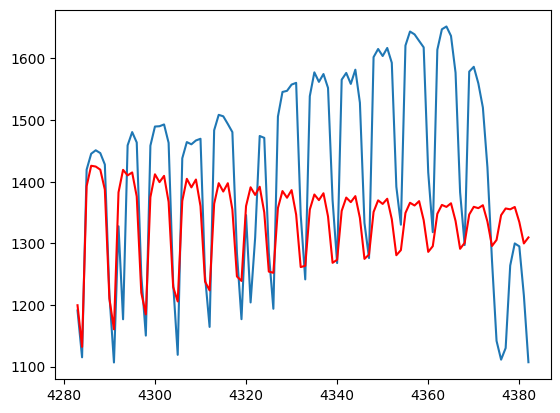

In [15]:
# Make the predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

# Plot the prediction vs test data
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()



That’s really not a bad model at it shows trend and movements (high/lows, etc) well but doesn’t quite get the extreme values.   Let’s check our root mean square error. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [16]:
#import r2_score
from sklearn.metrics import r2_score

#check the r2_score by passing test data and predicted data
r2_score(test_data, predictions)



0.07924280983832499

This gives us a root mean square value of 0.079, which isn’t terrible.

Congratulations!!! You've done it.

In this assignment you learned:

* AR models
* Implementing AR models


Keep practising until next assignment comes in. <br><br>

## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![](https://memecrunch.com/meme/BMFZD/bye-bye/image.gif?w=400&c=1)